<a href="https://colab.research.google.com/github/RafaelAnga/Artificial-Intelligence/blob/main/Clustering_Market_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import pandas as pd  # For handling datasets
import seaborn as sns  # For creating pairplot visualization

## Importing the dataset

In [ ]:
# Connect to Google Drive (specific to Google Colab environment)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Navigate to the directory containing the dataset
import os
os.chdir('/content/drive/MyDrive/Machine Learning/Clustering Templates/DataSet')
os.listdir()  # List files to confirm dataset availability

['Mall_Customers.csv']

In [ ]:
# Load the dataset into a Pandas DataFrame
dataset = pd.read_csv('Mall_Customers.csv')  # Customer segmentation dataset
df = dataset.copy()  # Create a copy for safe manipulation
X = dataset.iloc[:, [3, 4]].values  # Select columns for clustering (Annual Income, Spending Score)

In [ ]:
# Display first few rows of the dataset to understand its structure
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Using the elbow method to find the optimal number of clusters

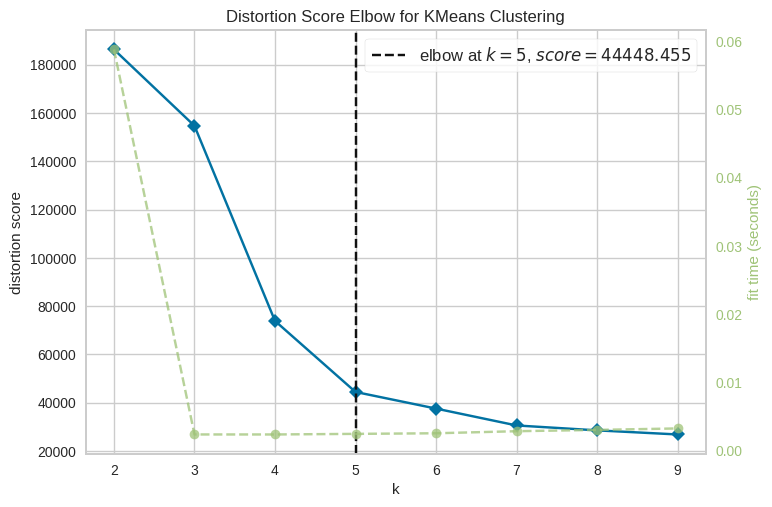

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize KMeans model and visualizer
model1 = KMeans(random_state=1)
visualizer1 = KElbowVisualizer(model1, k=(2, 10))  # Test clusters from 2 to 10


visualizer1.fit(X)  # Fit visualizer to data
visualizer1.show()  # Display elbow plot for optimal cluster selection
plt.show()

## Training the K-Means model on the dataset

In [ ]:
k_means = KMeans(n_clusters=5, init='k-means++', random_state=42)  # Use optimal clusters determined
y_kmeans = k_means.fit_predict(X)  # Predict cluster assignments

## Visualising the clusters

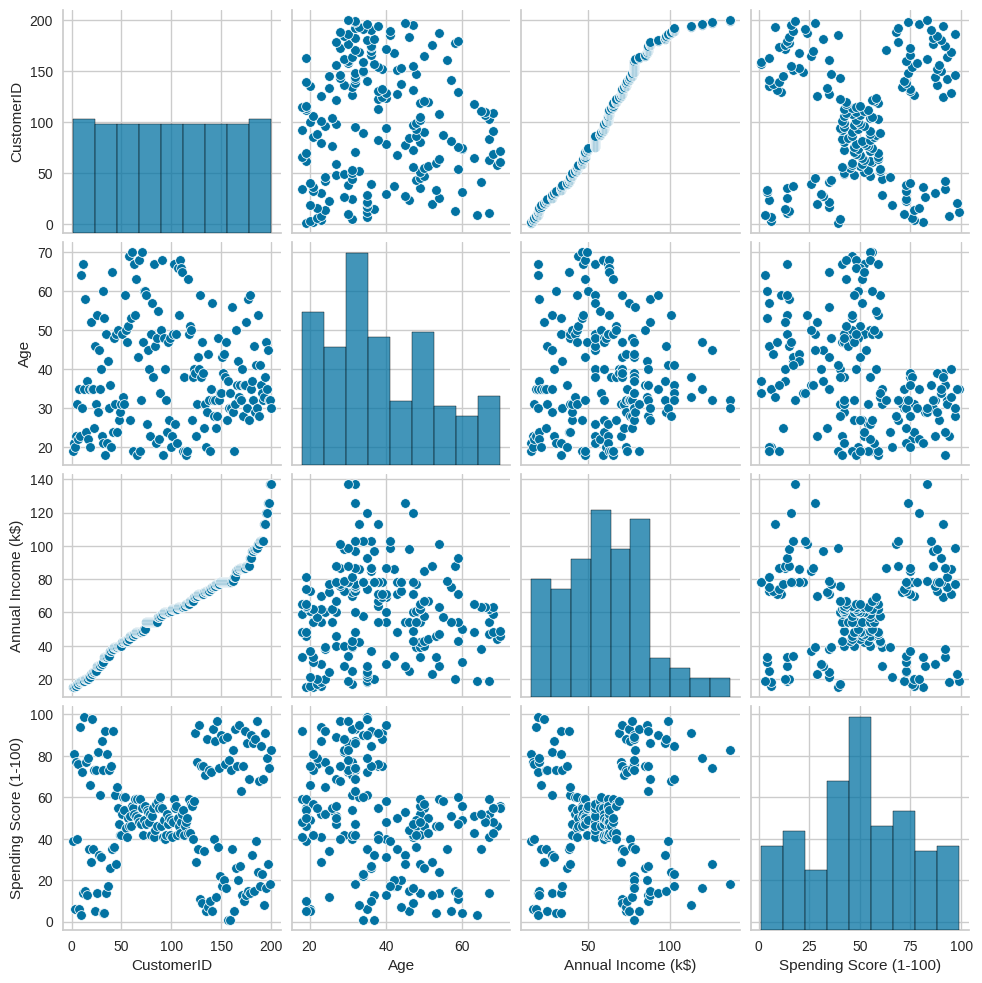

In [ ]:
sns.pairplot(df)  # Pairplot to understand relationships in raw data

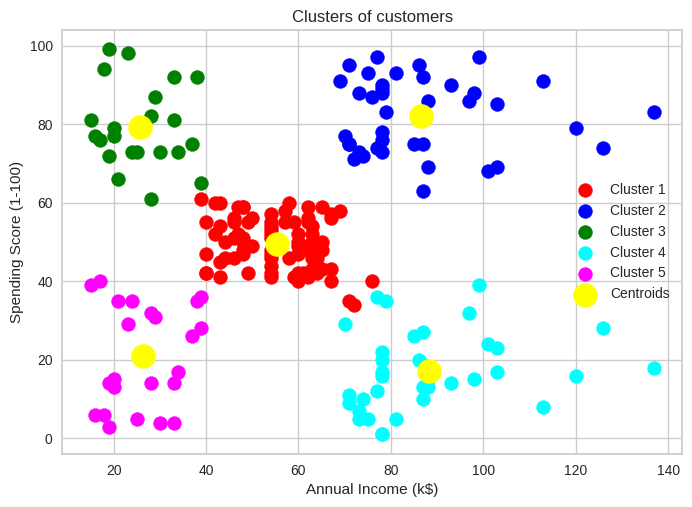

In [ ]:
# Scatter plot for visualizing clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Highlight cluster centroids
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Explanation of results

This analysis groups customers into five distinct categories based on their annual income and how much they spend. Here's a simple breakdown:

Clusters:

Each colored group represents a specific type of customer.
For example, one group may consist of customers with low income but high spending score (green).

Another group includes high-income, high-spending customers (blue).

Centroids:
The yellow dots are the "centers" of each group, representing the average characteristics of the customers in that group.
Purpose:

Businesses can use these groups to make targeted decisions, such as offering discounts to low-spending customers or creating premium offers for high-income customers.


# Conclusion for the Code
At the end of the analysis, we can summarize the findings as:

Five clusters of customers were identified based on their spending behavior and income.
The visualization shows how customers differ in their spending and income, making it easier to target marketing strategies.

The groups were divided as follows:

1. Group with low income (20K-40K) and low spending score (0-40)
2. Group with low income (20K-40K) and High Spending score (60-100)
3. Group with average income (40K-75K) and an average spending score(40-60)
4. Group with High average income (75K-140K) and low spending score (0-40)
5. Group with high average income (75K-140K) and high spending score (60-100)